In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
df = pd.read_json("reviews (1).json",lines=True)

In [170]:
df.shape

(1386, 9)

In [171]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1F6404F1VG29J,B000F83SZQ,Avidreader,"[0, 0]",I enjoy vintage books and movies so I enjoyed ...,5.0,Nice vintage story,1399248000,"05 5, 2014"
1,AN0N05A9LIJEQ,B000F83SZQ,critters,"[2, 2]",This book is a reissue of an old one; the auth...,4.0,Different...,1388966400,"01 6, 2014"
2,A795DMNCJILA6,B000F83SZQ,dot,"[2, 2]",This was a fairly interesting read. It had ol...,4.0,Oldie,1396569600,"04 4, 2014"
3,A1FV0SX13TWVXQ,B000F83SZQ,"Elaine H. Turley ""Montana Songbird""","[1, 1]",I'd never read any of the Amy Brewster mysteri...,5.0,I really liked it.,1392768000,"02 19, 2014"
4,A3SPTOKDG7WBLN,B000F83SZQ,Father Dowling Fan,"[0, 1]","If you like period pieces - clothing, lingo, y...",4.0,Period Mystery,1395187200,"03 19, 2014"


In [172]:
df = df.rename(columns={'asin':'product_id'})

In [173]:
df.dtypes

reviewerID         object
product_id         object
reviewerName       object
helpful            object
reviewText         object
overall           float64
summary            object
unixReviewTime      int64
reviewTime         object
dtype: object

In [174]:
df.reviewTime = pd.to_datetime(df.reviewTime)

In [175]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1386 entries, 0 to 1385
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   reviewerID      1386 non-null   object        
 1   product_id      1386 non-null   object        
 2   reviewerName    1384 non-null   object        
 3   helpful         1386 non-null   object        
 4   reviewText      1386 non-null   object        
 5   overall         1375 non-null   float64       
 6   summary         1386 non-null   object        
 7   unixReviewTime  1386 non-null   int64         
 8   reviewTime      1386 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 97.6+ KB


In [176]:
df[df.isna().any(axis=1)].head(13)

,reviewerID,product_id,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
22,A1UG4Q4D3OAH3A,B000FA64QO,dsa,"[0, 0]",Great book couldn't put it down. The story ex...,NaN,Ylesia,1391472000,2014-02-04
29,A2EN84QHDRZLP2,B000FBFMVG,Carl craft,"[0, 0]",Great short story. It gives a little more insi...,NaN,Another read,1388620800,2014-01-02
63,AEC18J7P03ZBP,B000FC2MB8,pigskin,"[0, 0]","I look forward to getting to the next books, a...",NaN,"Also, exciting and descriptive.",1375142400,2013-07-30
64,A39N0BN4B2Q7F,B000FDJ0FS,"Amazoner ""reader, thinker, doer""","[2, 9]",He had an english accent which he seemed tryin...,NaN,In was thinking of getting until I heard the c...,1386633600,2013-12-10
385,A2VQLTC61OV8U3,B000JQUTGK,NaN,"[0, 0]",Not very well written but historical details i...,4.0,Four Stars,1405555200,2014-07-17
549,A2Q49SE6Q1NVCQ,B000QCS8YM,David Wesley tonkin,"[0, 0]",There are not really enough superlatives ... o...,NaN,Conan Doyle is the Master!,1392508800,2014-02-16
550,AXYFNRDTY33TU,B000QCS8YM,"Josephnatdog ""Bookwormjr""","[0, 0]","Adventure, thrills, action, great detection. ...",NaN,Love it,1371513600,2013-06-18
551,A295A2TPG8JJ7Y,B000QCS8YM,Librarian,"[21, 21]",This authorized 2-volume set (joined into one ...,NaN,Absolute BEST Holmes set: 100% complete & perf...,1361664000,2013-02-24
552,A1M3NVR8A3O627,B000QCS8YM,Stephen,"[0, 0]",Volume 1 of the Sherlock Holmes series is abso...,NaN,Sherlock Holmes: The Complete Novels and Stori...,1382832000,2013-10-27
553,A2RA52XTSPZB9Y,B000QCS8YM,Susandee,"[0, 0]",The classics never go out of style. Sherlock a...,NaN,Great as always,1398124800,2014-04-22


In [177]:
noNames = df.loc[df.reviewerName.isna()]['reviewerID']

In [178]:
df.loc[df.reviewerID.isin(noNames)]

,reviewerID,product_id,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
385,A2VQLTC61OV8U3,B000JQUTGK,NaN,"[0, 0]",Not very well written but historical details i...,4.0,Four Stars,1405555200,2014-07-17
718,A3VXGX6X6B63K,B000SRGF2W,NaN,"[0, 0]",I won this book from Denise Agnew. I liked it...,5.0,Nice surprise,1405468800,2014-07-16


In [179]:
df.reviewerName = df.reviewerName.fillna('')

In [180]:
group_by_product = df[['product_id','overall']].groupby('product_id')
mean_overall_per_product = group_by_product.mean().rename(columns={'overall':'mean_product_overall'})
min_overall_per_product = group_by_product.min().rename(columns={'overall':'max_product_overall'})
max_overall_per_product = group_by_product.max().rename(columns={'overall':'min_product_overall'})

In [181]:
mean_overall_per_product

,mean_product_overall
product_id,
B000F83SZQ,4.250000
B000FA64PA,4.200000
B000FA64PK,4.375000
B000FA64QO,3.500000
B000FBFMVG,4.250000
...,...
B0015Z7VFG,3.882353
B0015Z7VFQ,3.833333
B0015Z7VWE,3.866667


In [182]:
min_overall_per_product

,max_product_overall
product_id,
B000F83SZQ,4.0
B000FA64PA,3.0
B000FA64PK,3.0
B000FA64QO,2.0
B000FBFMVG,3.0
...,...
B0015Z7VFG,1.0
B0015Z7VFQ,1.0
B0015Z7VWE,1.0


In [183]:
max_overall_per_product

,min_product_overall
product_id,
B000F83SZQ,5.0
B000FA64PA,5.0
B000FA64PK,5.0
B000FA64QO,5.0
B000FBFMVG,5.0
...,...
B0015Z7VFG,5.0
B0015Z7VFQ,5.0
B0015Z7VWE,5.0


In [184]:
merged_df = pd.merge(df, mean_overall_per_product, on='product_id')
merged_df['overall'].fillna(merged_df['mean_product_overall'].round(), inplace=True)
merged_df.drop(columns=['mean_product_overall'],inplace=True)
df = merged_df
df[df.isna().any(axis=1)]

,reviewerID,product_id,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
549,A2Q49SE6Q1NVCQ,B000QCS8YM,David Wesley tonkin,"[0, 0]",There are not really enough superlatives ... o...,NaN,Conan Doyle is the Master!,1392508800,2014-02-16
550,AXYFNRDTY33TU,B000QCS8YM,"Josephnatdog ""Bookwormjr""","[0, 0]","Adventure, thrills, action, great detection. ...",NaN,Love it,1371513600,2013-06-18
551,A295A2TPG8JJ7Y,B000QCS8YM,Librarian,"[21, 21]",This authorized 2-volume set (joined into one ...,NaN,Absolute BEST Holmes set: 100% complete & perf...,1361664000,2013-02-24
552,A1M3NVR8A3O627,B000QCS8YM,Stephen,"[0, 0]",Volume 1 of the Sherlock Holmes series is abso...,NaN,Sherlock Holmes: The Complete Novels and Stori...,1382832000,2013-10-27
553,A2RA52XTSPZB9Y,B000QCS8YM,Susandee,"[0, 0]",The classics never go out of style. Sherlock a...,NaN,Great as always,1398124800,2014-04-22


In [185]:
df.query('product_id == "B000QCS8YM"')

,reviewerID,product_id,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
549,A2Q49SE6Q1NVCQ,B000QCS8YM,David Wesley tonkin,"[0, 0]",There are not really enough superlatives ... o...,NaN,Conan Doyle is the Master!,1392508800,2014-02-16
550,AXYFNRDTY33TU,B000QCS8YM,"Josephnatdog ""Bookwormjr""","[0, 0]","Adventure, thrills, action, great detection. ...",NaN,Love it,1371513600,2013-06-18
551,A295A2TPG8JJ7Y,B000QCS8YM,Librarian,"[21, 21]",This authorized 2-volume set (joined into one ...,NaN,Absolute BEST Holmes set: 100% complete & perf...,1361664000,2013-02-24
552,A1M3NVR8A3O627,B000QCS8YM,Stephen,"[0, 0]",Volume 1 of the Sherlock Holmes series is abso...,NaN,Sherlock Holmes: The Complete Novels and Stori...,1382832000,2013-10-27
553,A2RA52XTSPZB9Y,B000QCS8YM,Susandee,"[0, 0]",The classics never go out of style. Sherlock a...,NaN,Great as always,1398124800,2014-04-22


In [186]:
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1386 entries, 0 to 1385
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   reviewerID      1386 non-null   object        
 1   product_id      1386 non-null   object        
 2   reviewerName    1386 non-null   object        
 3   helpful         1386 non-null   object        
 4   reviewText      1386 non-null   object        
 5   overall         1381 non-null   float64       
 6   summary         1386 non-null   object        
 7   unixReviewTime  1386 non-null   int64         
 8   reviewTime      1386 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 108.3+ KB


In [187]:
unique_products = df.product_id.nunique()
unique_products

129

In [188]:
unique_reviewer = df.reviewerID.nunique()
unique_reviewer

1131

In [189]:
df['product_id'].value_counts().idxmax()

'B000JMLBHU'

In [190]:
highest_reviewer = df['reviewerID'].value_counts().idxmax()
highest_reviewer

'A320TMDV6KCFU'

In [191]:
df.loc[df['reviewerID'] == highest_reviewer].nsmallest(1,'overall')

,reviewerID,product_id,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
1133,A320TMDV6KCFU,B0012W11BM,MNix,"[5, 5]",Federal Judge Jackson Benedict is trying a cas...,4.0,Court Appointed,1210118400,2008-05-07


In [192]:
df['reviewerID'].value_counts()[df['reviewerID'].value_counts() > 5].count()

5

In [193]:
df.loc[(df.product_id == 'B000GFK7L6') & (df.overall == 1)]['reviewerName']

79           Amazon Customer "EmanEkaf"
81     Amazoner "reader, thinker, doer"
86                        Douglas Banks
100                          Tyme4abook
Name: reviewerName, dtype: object

In [194]:
df['days_since_review'] = (pd.to_datetime("today") - df.reviewTime).dt.days

In [195]:
help_arr = []
for h in df.helpful:
    help_arr.append(h[0] >= h[1]*0.5)
df['helpfull_bool'] = help_arr

In [196]:
df

,reviewerID,product_id,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,days_since_review,helpfull_bool
0,A1F6404F1VG29J,B000F83SZQ,Avidreader,"[0, 0]",I enjoy vintage books and movies so I enjoyed ...,5.0,Nice vintage story,1399248000,2014-05-05,3212,True
1,AN0N05A9LIJEQ,B000F83SZQ,critters,"[2, 2]",This book is a reissue of an old one; the auth...,4.0,Different...,1388966400,2014-01-06,3331,True
2,A795DMNCJILA6,B000F83SZQ,dot,"[2, 2]",This was a fairly interesting read. It had ol...,4.0,Oldie,1396569600,2014-04-04,3243,True
3,A1FV0SX13TWVXQ,B000F83SZQ,"Elaine H. Turley ""Montana Songbird""","[1, 1]",I'd never read any of the Amy Brewster mysteri...,5.0,I really liked it.,1392768000,2014-02-19,3287,True
4,A3SPTOKDG7WBLN,B000F83SZQ,Father Dowling Fan,"[0, 1]","If you like period pieces - clothing, lingo, y...",4.0,Period Mystery,1395187200,2014-03-19,3259,False
...,...,...,...,...,...,...,...,...,...,...,...
1381,A2HZ1PF9CF38DB,B00164WE1W,Hollie,"[2, 2]",This story was a great quick read...it has mis...,5.0,a Great quick read!,1357084800,2013-01-02,3700,True
1382,A1SXKUJKM8JFPG,B00164WE1W,kimberlyindy,"[0, 0]",I love to read Novellas when I am running shor...,5.0,Wish it was longer.......,1356393600,2012-12-25,3708,True
1383,A388AC8UPUGOUB,B00164WE1W,mengel2,"[0, 0]",I love reading mini novels and you can't go wr...,5.0,A Heart-warming Story,1356480000,2012-12-26,3707,True
1384,A3HMXAY912371K,B00164WE1W,Monica Tillery,"[0, 0]","I don't know how she did it, but Jane Porter m...",5.0,"Short, Sweet, and Heartwarming",1356652800,2012-12-28,3705,True


In [197]:
df.reset_index(inplace=True)

In [212]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
from tqdm import tqdm
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [199]:
MODEL= f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [200]:
example = df.sample(1).reviewText.values[0]
example

"Hailey Jennison was uncomfortable with her body, and had always been shy because of it.  She had developed early, and had to constantly deal with unwanted attention from men.  She didn't go out very often, but did enjoy getting together with her friends on Friday nights.  They had recently become obsessed with a neighbor that provided an exciting sideshow for them.  He is a construction worker named Gage Warren with an incredibly sculpted body he didn't mind showing them frequently.  One night when Gage caught them looking in his windows, they scattered, but not fast enough because before she knew it Hailey had been dragged to his apartment.  He had been attracted to Hailey from the first moment he saw her, and now that he saw his chance, he was going to take it.After they had been together a couple of weeks, Hailey finally told him what he had known all along.  She was afraid he would leave if they didn't have sex, and equated it to her dad leaving her when she was just a small child

In [201]:
def polarity_scores(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg':scores[0],
        'roberta_neu':scores[1],
        'roberta_pos':scores[2],
    }
    return scores_dict

In [202]:
polarity_scores(example)

{'roberta_neg': 0.05914035,
 'roberta_neu': 0.35210857,
 'roberta_pos': 0.5887511}

In [203]:
res = {}
failed = []
for i, row in tqdm(df.iterrows(),total=len(df)):
    try:
        text = row['reviewText']
        my_idx = row['index']
        res[my_idx] = polarity_scores(text)
    except RuntimeError:
        failed.append(my_idx)
print(failed)

100%|██████████| 1386/1386 [03:09<00:00,  7.32it/s]

[34, 43, 69, 93, 114, 123, 224, 361, 389, 395, 425, 545, 558, 603, 605, 609, 617, 618, 659, 672, 677, 681, 741, 744, 799, 849, 906, 913, 972, 1018, 1044, 1071, 1074, 1084, 1090, 1093, 1197, 1210, 1232, 1270, 1285, 1306, 1311, 1323, 1333, 1353, 1356]


In [204]:
results_df = pd.DataFrame(res).T
results_df.reset_index(inplace=True)
results_df = results_df.merge(df, how='left')

In [205]:
results_df.overall.unique()

array([ 5.,  4.,  3.,  2.,  1., nan])

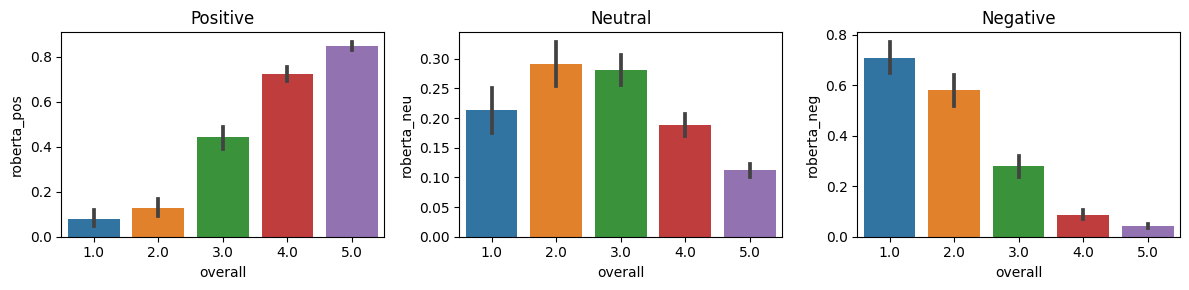

In [206]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=results_df, x='overall', y='roberta_pos', ax=axs[0])
sns.barplot(data=results_df, x='overall', y='roberta_neu', ax=axs[1])
sns.barplot(data=results_df, x='overall', y='roberta_neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [207]:
df['Simulated_overall'] = np.round(results_df['roberta_pos']*5)

<AxesSubplot: xlabel='overall', ylabel='Count'>

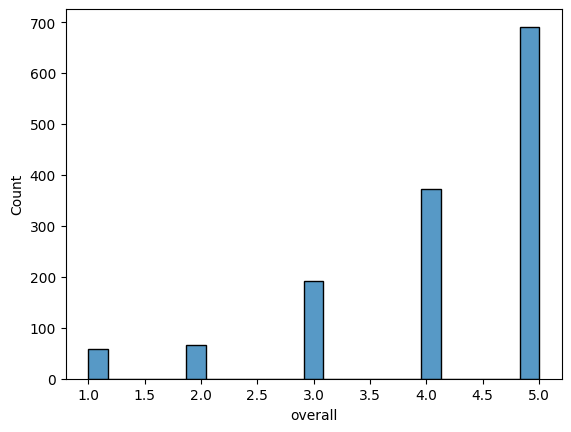

In [220]:
sns.histplot(data=df,x='overall')

<AxesSubplot: xlabel='Simulated_overall', ylabel='Count'>

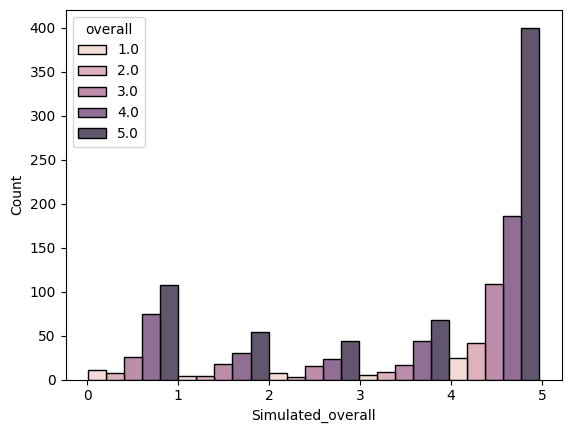

In [208]:
sns.histplot(data=df,x='Simulated_overall',hue='overall', multiple="dodge",bins=5)

In [217]:
df2 = df.dropna()
print(f"MSE: {mean_squared_error(df2['overall'],df2['Simulated_overall'])}")
print(f"MAE: {mean_absolute_error(df2['overall'],df2['Simulated_overall'])}")

MSE: 4.619612571908004
MAE: 1.5765640030208712
